In [2]:
import _init_

In [31]:
from constants import *
from set_path import *
from config import *
import seaborn as sns

In [144]:
import scipy.integrate as integrate

0.05, 0.29--->> Gamma

# Using analytical forms of the wind acceleration law-- constant momentum injection case

0.1 -1.7269388197455342
0.1 -3.0
-2.3025850929940455


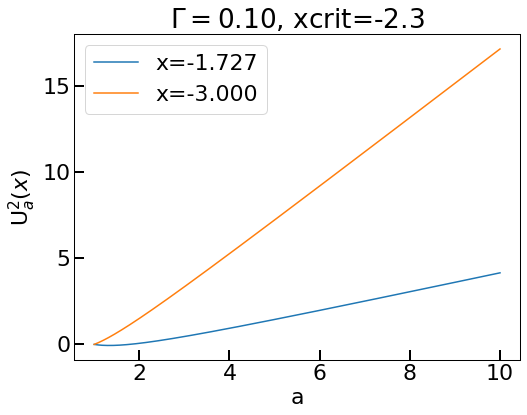

In [138]:
# xcrit = -1.5
# x = xcrit*0.75
plt.figure(figsize=(8,6))
Gamma = 0.1
xcrit = np.log(Gamma)
arr  = np.linspace(1.,10.,400)
for x in [0.75*xcrit, -3.]:
#     Uax_sq =  (Gamma * np.exp(-x)) * (arr-1.)/arr #fixed area
    Uax_sq1 = (Gamma*np.exp(-x)-1./arr)*(arr-1) #fixed solid angle
    plt.plot(arr, (Uax_sq1), label = 'x=%.3f'%(x))
    print(Gamma, x)
plt.legend()
plt.ylabel(r'U$^2_a (x)$')
plt.xlabel('a')
plt.title(r'$\Gamma=%.2f$'%(Gamma) + r', xcrit=%.1f'%(xcrit))
print(xcrit)

In [ ]:
### Uax_sq2

In [171]:
def Uax(a, gamma, x):
    Ua_x = ((gamma*np.exp(-x)-1./a)*(a-1))**(0.5 )   #fixed solid angle
    return Ua_x

In [175]:
def da_Uax(a, gamma, x, v0, da):
    U_ax = Uax(a, gamma, x)  #fixed solid angle
    dt = da*r0/(U_ax*v0)
    return dt

/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_35775/1319383458.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dt = da*r0/(U_ax*v0)
/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_35775/2149036017.py:16: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  t[j,i] = integrate.quad(da_Uax, 1, a, args=(gamma, x, v0, da))[0]
/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_35775/1319383458.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dt = da*r0/(U_ax*v0)
/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_35775/2149036017.py:16: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  t[j,i] = integrate.quad(da_Uax, 1, a, args=(gamma, x, v0, da))[0]
/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_35775/1319383458.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dt = da*r

Text(0.5, 1.0, '$r_0=250$ pc')

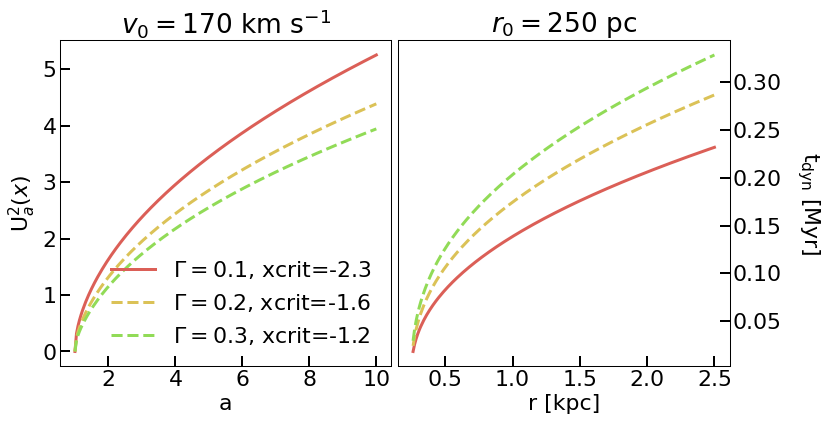

In [181]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12,6))
arr  = np.linspace(1.,10.,200)
a_scale = r0*arr
colors =  sns.color_palette("hls", 8)
i=0
ls = ['-', '--', '--']
#Uax_sq =  (gamma * np.exp(-x)) * (arr-1.)/arr #fixed area
gamma_arr = np.asarray([0.1, 0.2, 0.3])
t         = np.zeros((gamma_arr.shape[0],arr.shape[0]))
j = 0
for gamma in gamma_arr:
    xcrit = np.log(gamma)
    x     = xcrit*1.5
    i=0
    for a in arr:
        t[j,i] = integrate.quad(da_Uax, 1, a, args=(gamma, x, v0, da))[0] 
        i+=1
    U_ax = Uax(arr, gamma, x)
    ax[0].plot(arr, U_ax, ls=ls[j], lw=3.0, label = '$\Gamma=$%.1f'%(gamma)+ r', xcrit=%.1f'%(xcrit),\
               color=colors[j])
    ax[1].plot(a_scale/kpc, t[j]/Myr, ls=ls[j], lw=3.0, color=colors[j])

    j+=1
    
ax[0].legend(frameon=False)
ax[0].set_ylabel(r'U$^2_a (x)$')
plt.setp(ax[0], 'xlabel', 'a')
plt.setp(ax[1], 'xlabel', 'r [kpc]')
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True)
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r't$_{\rm dyn}$ [Myr]', rotation=270, labelpad=40)
ax[1].yaxis.tick_right()
# ax[0].set_ylim(0.0, 1.5)
ax[0].set_title(r"$v_0=170$ km s$^{-1}$")
ax[1].set_title(r"$r_0=250$ pc")

In [ ]:
### v0 = 170 * kmps
r0 = 250. * pc
a_scale = r0*arr
x = xcrit
da  = arr[1] - arr[0]
# Uax_sq =  (Gamma * np.exp(-x)) * (arr-1.)/arr
ur_arr = v0*np.sqrt(Uax_sq)
dt = np.zeros(a_scale.shape[0])
dt = da*r0/ur_arr[1:]
t = np.cumsum(dt)
# print('Total time=',t/Myr)
plt.plot(  a_scale[1:]/kpc,t/Myr)
Sigma0 = 52.*Msun_pcsq
Sigma_mol_ini = Sigma0 * np.exp(x)
tdiss = 7. * (Sigma_mol_ini/10./Msun_pcsq) * Myr
plt.axhline(tdiss/Myr, ls='--')
plt.xlabel('r [kpc]')
plt.ylabel(r't$_{\rm dyn}$ [Myr]')
plt.xlim(0.25, 2.5)
plt.title(r'$\Gamma=%.2f$'%(Gamma) + r', xcrit=%.1f'%(xcrit))